# Machine Learning for Anomaly Detection

In [1]:
import numpy as np
import pandas as pd
random_seed = np.random.RandomState(12)

In [4]:
# generate set of normal observation to be used as training data
x_train = 0.5*random_seed.randn(500,2)
x_train= np.r_[x_train+3, x_train]
x_train=pd.DataFrame(x_train, columns = ["x","y"])

In [5]:
# generate a testing set, that consist normal observation
x_test = 0.5*random_seed.randn(500,2)
x_test= np.r_[x_test+3, x_test]
x_test=pd.DataFrame(x_test, columns = ["x","y"])


In [6]:
# generate a set of outlier observation.they are generated from a different distribution the the normal distrib
x_outliers= random_seed.uniform(low=-5, high=5, size=(50,2))
x_outliers= pd.DataFrame(x_outliers, columns = ["x","y"])

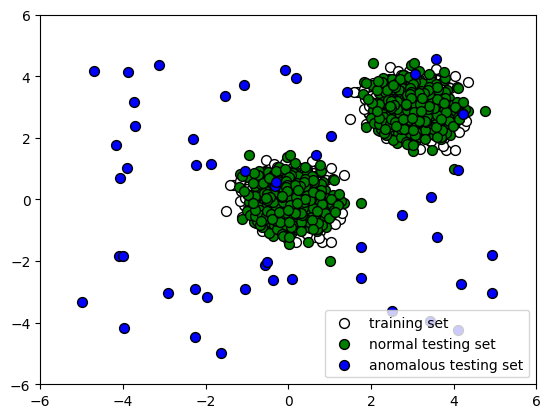

In [8]:
#our generated data
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(x_test.x, x_test.y, c ="green",s=50, edgecolor="black")
p3 = plt.scatter(x_outliers.x, x_outliers.y, c ="blue",s=50, edgecolor="black")

plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc = "lower right",

)
plt.show()



In [9]:
#train Isolation Forest model in training data
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(x_train)
y_pred_train= clf.predict(x_train)
y_pred_test= clf.predict(x_test)
y_pred_outliers= clf.predict(x_outliers)

In [10]:
#algorithm performs. append the labels to x_outliers
x_outliers=x_outliers.assign(pred=y_pred_outliers)
x_outliers.head()

,x,y,pred
0,1.415972,3.499366,-1
1,-3.898739,1.012180,-1
2,-4.978582,-3.320093,-1
3,-0.308416,0.425476,1
4,-1.967229,-3.162033,-1


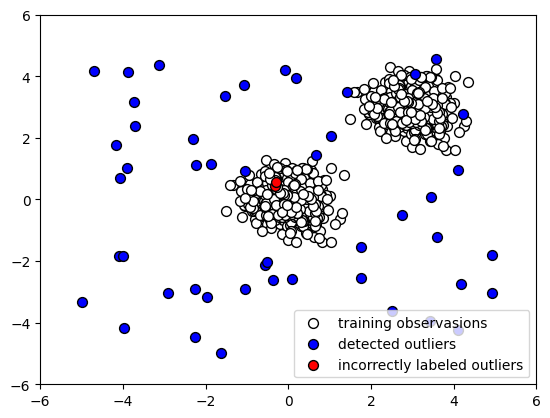

In [14]:
# plot the isolation Forest predictions on the outliters to see how many it caught
p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(
    x_outliers.loc[x_outliers.pred ==-1, ["x"]],
    x_outliers.loc[x_outliers.pred ==-1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    x_outliers.loc[x_outliers.pred == 1, ["x"]],
    x_outliers.loc[x_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)


plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    ["training observasions", "detected outliers", "incorrectly labeled outliers"],
    loc = "lower right",

)
plt.show()


In [15]:
#perform on the normal testing data. append the predicted label to x_test
x_test =x_test.assign(pred=y_pred_test)
x_test.head()

,x,y,pred
0,2.778772,3.470852,1
1,2.042210,2.915874,-1
2,4.351312,2.878281,-1
3,3.060331,3.394622,1
4,3.919364,2.093686,-1


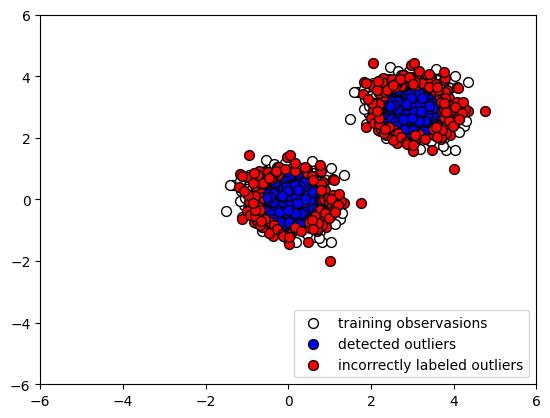

In [16]:
#lets plot results to see whether our classifier labeled the normal testing data correctly
p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(
    x_test.loc[x_test.pred ==1, ["x"]],
    x_test.loc[x_test.pred ==1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black"
)
p3 = plt.scatter(
    x_test.loc[x_test.pred == -1, ["x"]],
    x_test.loc[x_test.pred == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black"
)


plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    ["training observasions",
     "detected outliers",
     "incorrectly labeled outliers"],
    loc = "lower right",

)
plt.show()


Step 1: loading the liraries that will allow us to manipulate data quickly and easily
Step 2, we generate a trainign and testing set consisting of normal
observations. These have the same distributions

Step 3 we generate the remainder of our testing set by creating outliers. This
anomalous dataset has a different distribution from the training data and the rest of
the testing data.

Step 4: By plotting the data, we see that some outlier points look indistinguishable
from normal points. this guarantees that our classifier will have a significant
percetange of misclassifications due to the nature of the data.

Step 5. We fit an instance of Isolation Forest with default parameters to the training
data.

Step 6. we append the predicted labels to x_outliers to examine how algorithm performs

step 7. we plot the preditions of the isolation fores instance on the outliers

step 8 we append the predicted labels x_test in preparation for analysis

step 9 we plot the predictions of the Isolation forest instance on the normal testing data